<a href="https://colab.research.google.com/github/kaisarfardin6620/Real-vs.-Fake-News-Classifier/blob/main/Real_vs_Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [308]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve, f1_score

In [309]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [310]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [311]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/fakenews/fake_or_real_news.csv')

In [312]:
df.shape

(6335, 4)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [314]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [315]:
df.head(3)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL


In [316]:
df.columns = ['id', 'title', 'text', 'label']

In [317]:
df.head(3)

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL


In [318]:
df['combined'] = df['title'] + " " + df['text']

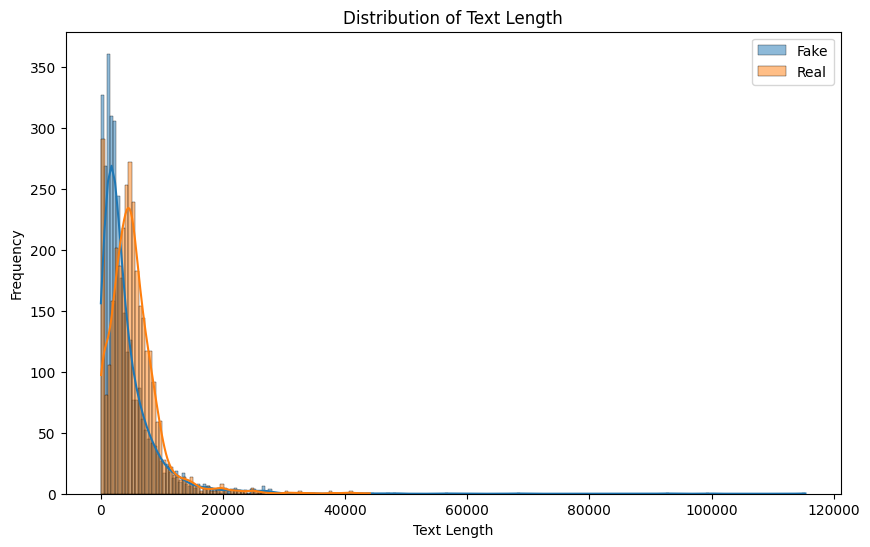

In [319]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 'FAKE']['text_length'], label='Fake', kde=True)
sns.histplot(df[df['label'] == 'REAL']['text_length'], label='Real', kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [320]:
df.drop(['id','title','text'], axis=1, inplace=True)

In [321]:
df.head()

,label,combined,text_length
0,FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,7518
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,2646
2,REAL,Kerry to go to Paris in gesture of sympathy U....,2543
3,FAKE,Bernie supporters on Twitter erupt in anger ag...,2660
4,REAL,The Battle of New York: Why This Primary Matte...,1840


In [322]:
df.isnull().sum()

,0
label,0
combined,0
text_length,0


In [323]:
df.duplicated().sum()

29

In [324]:
df.drop_duplicates(inplace=True)

In [325]:
df['label'].value_counts()

,count
label,
REAL,3154
FAKE,3152


In [326]:
mapping = {'FAKE': 0, 'REAL': 1}

In [327]:
df['label'] = df['label'].map(mapping)

In [328]:
df.head(3)

,label,combined,text_length
0,0,You Can Smell Hillary’s Fear Daniel Greenfield...,7518
1,0,Watch The Exact Moment Paul Ryan Committed Pol...,2646
2,1,Kerry to go to Paris in gesture of sympathy U....,2543


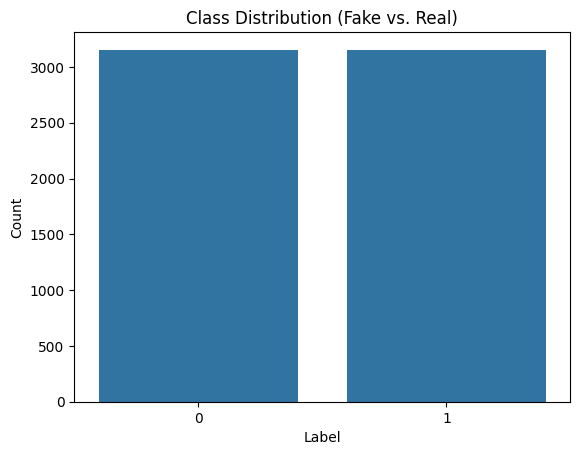

In [329]:
sns.countplot(x='label', data=df)
plt.title('Class Distribution (Fake vs. Real)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

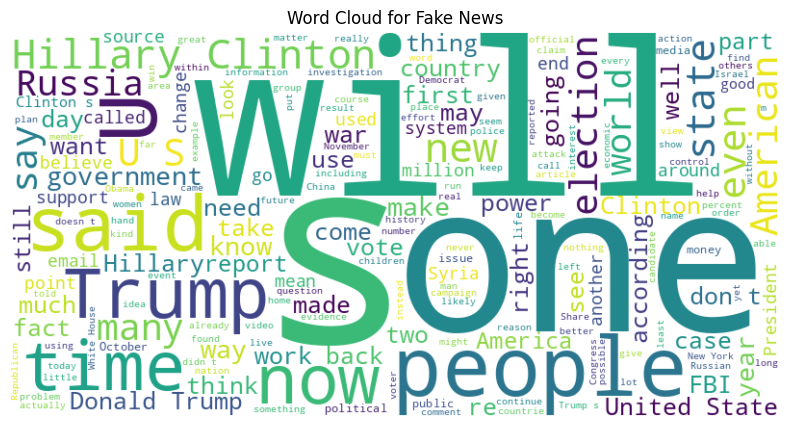

In [330]:
fake_news_text = ' '.join(df[df['label'] == 0]['combined'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(fake_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()

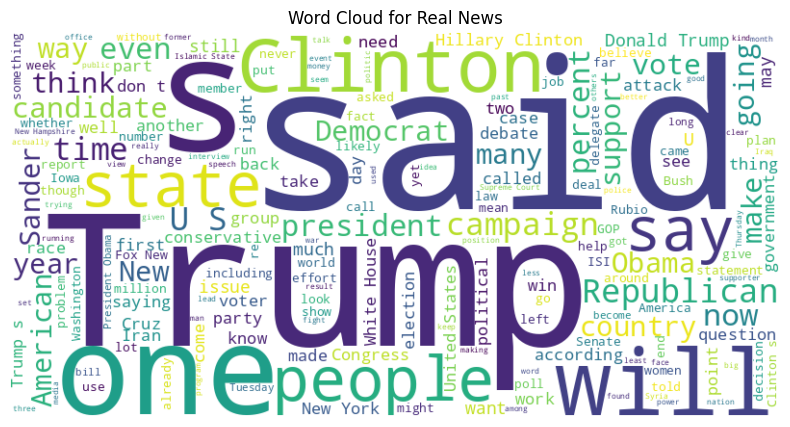

In [331]:
real_news_text = ' '.join(df[df['label'] == 1]['combined'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(real_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()

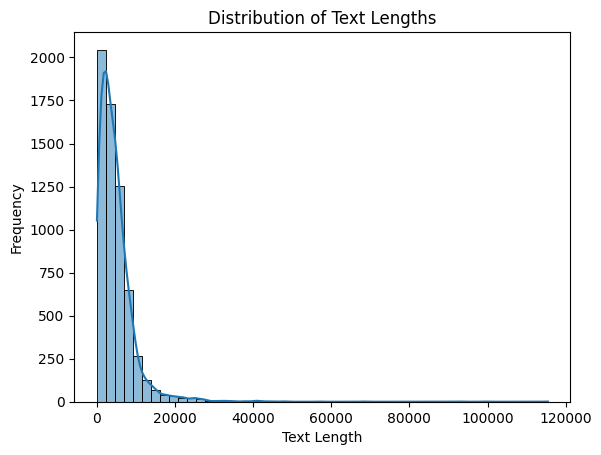

In [332]:
df['text_length'] = df['combined'].apply(lambda x: len(str(x)))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

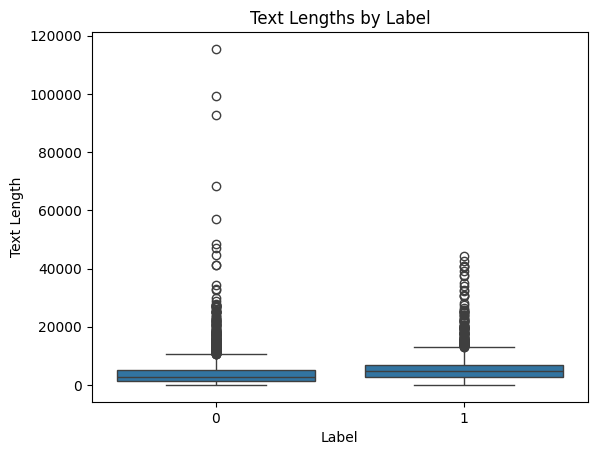

In [333]:
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Lengths by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

In [334]:
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['text_length'] >= lower_bound) & (df['text_length'] <= upper_bound)]

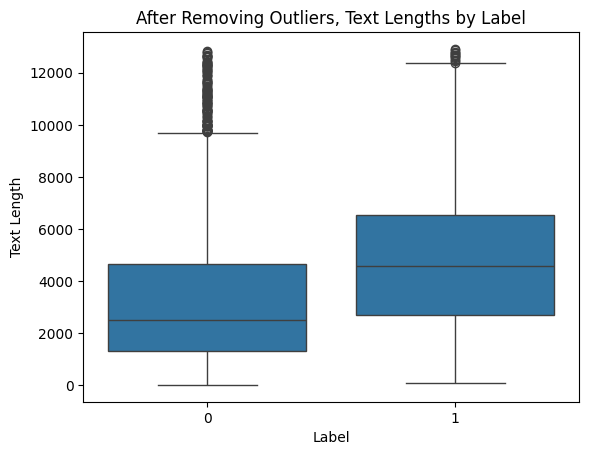

In [335]:
sns.boxplot(x='label', y='text_length', data=df_filtered)
plt.title('After Removing Outliers, Text Lengths by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

In [336]:
df_filtered.drop('text_length', axis=1, inplace=True)

In [337]:
df_filtered.head(3)

,label,combined
0,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,1,Kerry to go to Paris in gesture of sympathy U....


In [338]:
ds = df_filtered

In [339]:
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [340]:
def preprocess_text(text):
    text = str(text)
    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'[^\x00-\x7F]+', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()

    words = text.split()

    words = [word for word in words if word not in stopwords and len(word) > 2]
    #words = [word for word in words if word not in stopwords]

    words = [lemmatizer.lemmatize(word) for word in words]

    #words = [stemmer.stem(word) for word in words]

    return " ".join(words)

In [341]:
ds['clean_text'] = ds['combined'].apply(preprocess_text)

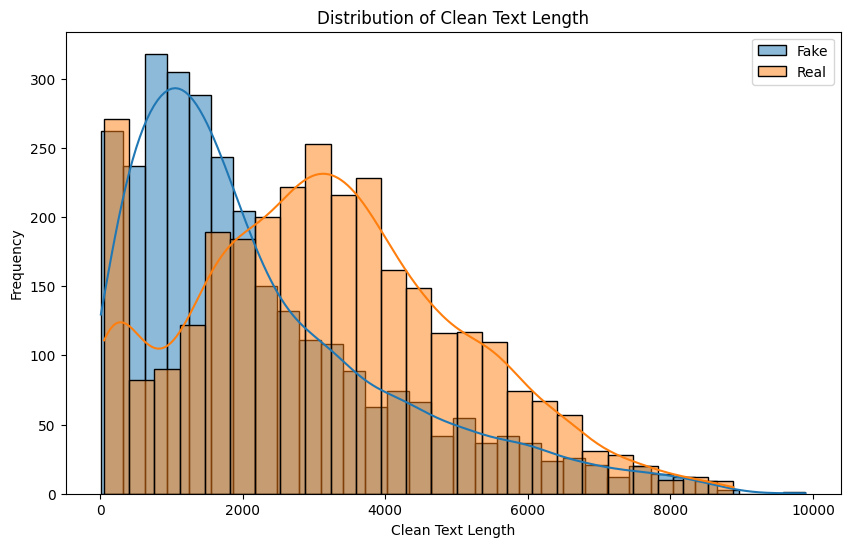

In [342]:
ds['clean_text_length'] = ds['clean_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(ds[ds['label'] == 0]['clean_text_length'], label='Fake', kde=True)
sns.histplot(ds[ds['label'] == 1]['clean_text_length'], label='Real', kde=True)
plt.title('Distribution of Clean Text Length')
plt.xlabel('Clean Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [343]:
#vectorizer = TfidfVectorizer(max_features=50000)
#x = vectorizer.fit_transform(ds['combined'])

In [344]:
#vectorizer = CountVectorizer(max_features=50000)
#x = vectorizer.fit_transform(ds['combined'])

In [345]:
#vectorizer = TfidfVectorizer(
#    max_features=30000,
#    ngram_range=(1,2),
#    min_df=5,
#    max_df=0.9
#)
#x = vectorizer.fit_transform(ds['combined'])

In [346]:
vectorizer = CountVectorizer(
    max_features=30000,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.9
)
x = vectorizer.fit_transform(ds['combined'])

In [347]:
y = ds['label']

In [348]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [349]:
lg = LogisticRegression()

In [350]:
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)*100
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print('Accuracy: {:.2f}'.format(accuracy))
print('*'*50)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       586
           1       0.95      0.91      0.93       619

    accuracy                           0.93      1205
   macro avg       0.93      0.93      0.93      1205
weighted avg       0.93      0.93      0.93      1205

[[554  32]
 [ 57 562]]
Accuracy: 92.61
**************************************************


In [351]:
dt = DecisionTreeClassifier()

In [352]:
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
accuracy = dt.score(x_test, y_test)*100
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print('Accuracy: {:.2f}'.format(accuracy))
print('*'*50)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       586
           1       0.84      0.78      0.81       619

    accuracy                           0.81      1205
   macro avg       0.81      0.81      0.81      1205
weighted avg       0.82      0.81      0.81      1205

[[496  90]
 [135 484]]
Accuracy: 81.33
**************************************************


In [353]:
rf = RandomForestClassifier()

In [354]:
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
accuracy = rf.score(x_test, y_test)*100
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print('Accuracy: {:.2f}'.format(accuracy))
print('*'*50)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       586
           1       0.91      0.88      0.89       619

    accuracy                           0.89      1205
   macro avg       0.89      0.89      0.89      1205
weighted avg       0.89      0.89      0.89      1205

[[530  56]
 [ 74 545]]
Accuracy: 89.21
**************************************************


In [355]:
knn = KNeighborsClassifier()

In [356]:
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy = knn.score(x_test, y_test)*100
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print('Accuracy: {:.2f}'.format(accuracy))
print('*'*50)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       586
           1       0.86      0.72      0.79       619

    accuracy                           0.80      1205
   macro avg       0.81      0.80      0.80      1205
weighted avg       0.81      0.80      0.80      1205

[[516  70]
 [173 446]]
Accuracy: 79.83
**************************************************


In [357]:
svm = SVC()

In [358]:
svm.fit(x_train, y_train)
pred = svm.predict(x_test)
accuracy = svm.score(x_test, y_test)*100
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print('Accuracy: {:.2f}'.format(accuracy))
print('*'*50)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       586
           1       0.94      0.81      0.87       619

    accuracy                           0.88      1205
   macro avg       0.89      0.88      0.88      1205
weighted avg       0.89      0.88      0.88      1205

[[556  30]
 [116 503]]
Accuracy: 87.88
**************************************************


In [359]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine']
accuracy = [
    lg.score(x_test, y_test)*100,
    dt.score(x_test, y_test)*100,
    rf.score(x_test, y_test)*100,
    knn.score(x_test, y_test)*100,
    svm.score(x_test, y_test)*100
]

In [360]:
data = {'Model': models, 'Accuracy': accuracy}
ds_accuracy = pd.DataFrame(data)

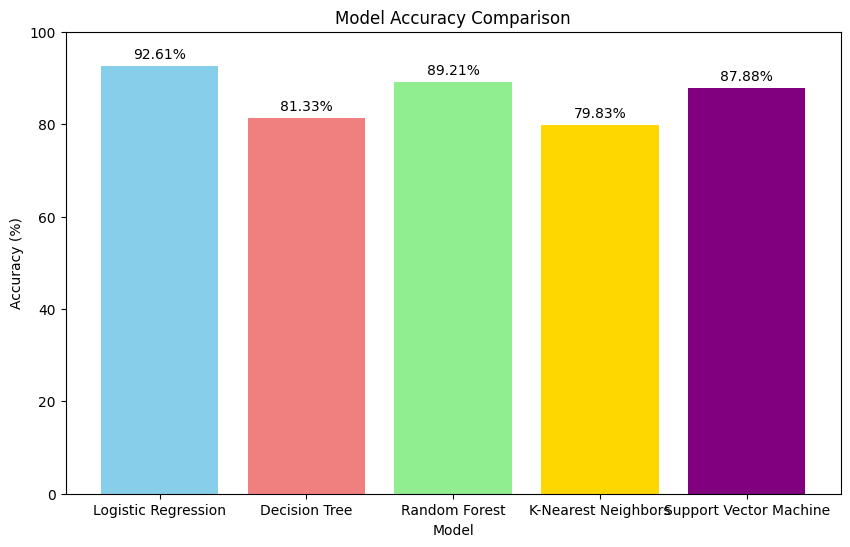

In [361]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['skyblue', 'lightcoral', 'lightgreen', 'gold','purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

for i, score in enumerate(accuracy):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center', va='bottom')

plt.show()

In [362]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder


In [363]:
x_train_ann = x_train.toarray()
x_test_ann = x_test.toarray()

In [364]:
label_encoder = LabelEncoder()
y_train_ann = label_encoder.fit_transform(y_train)
y_test_ann = label_encoder.transform(y_test)

In [365]:
ann = Sequential()
ann.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(x_train_ann.shape[1],)))
ann.add(Dropout(0.5))
ann.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann.add(Dropout(0.4))
ann.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann.add(Dropout(0.3))
ann.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann.add(Dropout(0.2))
ann.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [366]:
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [367]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [368]:
history = ann.fit(
    x_train_ann, y_train_ann,
    validation_split=0.2,
    epochs=50,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 58s 115ms/step - accuracy: 0.5958 - loss: 1.2042 - val_accuracy: 0.8900 - val_loss: 0.7914
Epoch 2/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 61s 127ms/step - accuracy: 0.8926 - loss: 0.7800 - val_accuracy: 0.9035 - val_loss: 0.7132
Epoch 3/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 78s 119ms/step - accuracy: 0.9614 - loss: 0.5929 - val_accuracy: 0.9139 - val_loss: 0.6780
Epoch 4/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 83s 121ms/step - accuracy: 0.9786 - loss: 0.4988 - val_accuracy: 0.9263 - val_loss: 0.6618
Epoch 5/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 85s 127ms/step - accuracy: 0.9860 - loss: 0.4443 - val_accuracy: 0.9305 - val_loss: 0.6562
Epoch 6/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 80s 122ms/step - accuracy: 0.9958 - loss: 0.3979 - val_accuracy: 0.9243 - val_loss: 0.6751
Epoch 7/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 84s 127ms/step - accuracy: 0.9921 - loss: 0.3804 - val_accuracy: 0.9315 - val_loss: 0.6468
Epoch 8/50
482/482 ━━━━━━━━━━━━━━━━━━━━ 80s 122ms/step - accuracy: 0.9951 - loss: 0

In [369]:
ann_loss, ann_accuracy = ann.evaluate(x_test_ann, y_test_ann)
print(f"Test Accuracy: {ann_accuracy:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9345 - loss: 0.4480
Test Accuracy: 0.9311


In [370]:
y_pred_ann = ann.predict(x_test_ann)
y_pred_classes = y_pred_ann.argmax(axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [371]:
print(classification_report(y_test_ann, y_pred_classes, target_names=label_encoder.classes_.astype(str)))
print(confusion_matrix(y_test_ann, y_pred_classes))
print('Accuracy: {:.2f}'.format(ann_accuracy))
print('*'*50)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       586
           1       0.94      0.93      0.93       619

    accuracy                           0.93      1205
   macro avg       0.93      0.93      0.93      1205
weighted avg       0.93      0.93      0.93      1205

[[547  39]
 [ 44 575]]
Accuracy: 0.93
**************************************************


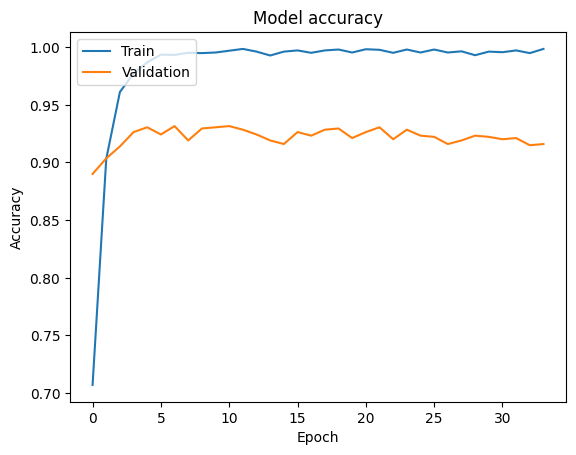

In [372]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

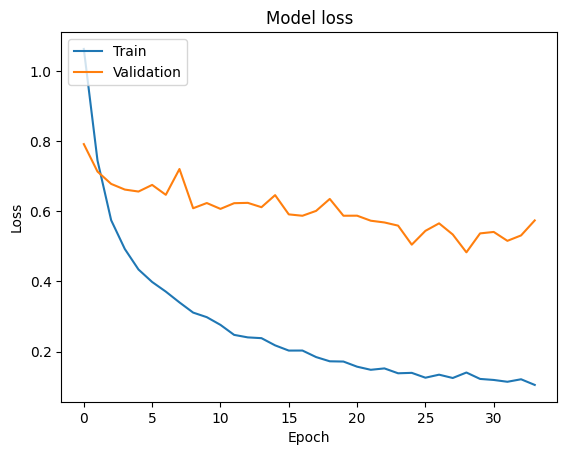

In [373]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [377]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine','ANN']
accuracy = [
    lg.score(x_test, y_test)*100,
    dt.score(x_test, y_test)*100,
    rf.score(x_test, y_test)*100,
    knn.score(x_test, y_test)*100,
    svm.score(x_test, y_test)*100,
    ann.evaluate(x_test_ann, y_test_ann, verbose=0)[1]*100
]

In [378]:
data = {'Model': models, 'Accuracy': accuracy}
ds_accuracy = pd.DataFrame(data)

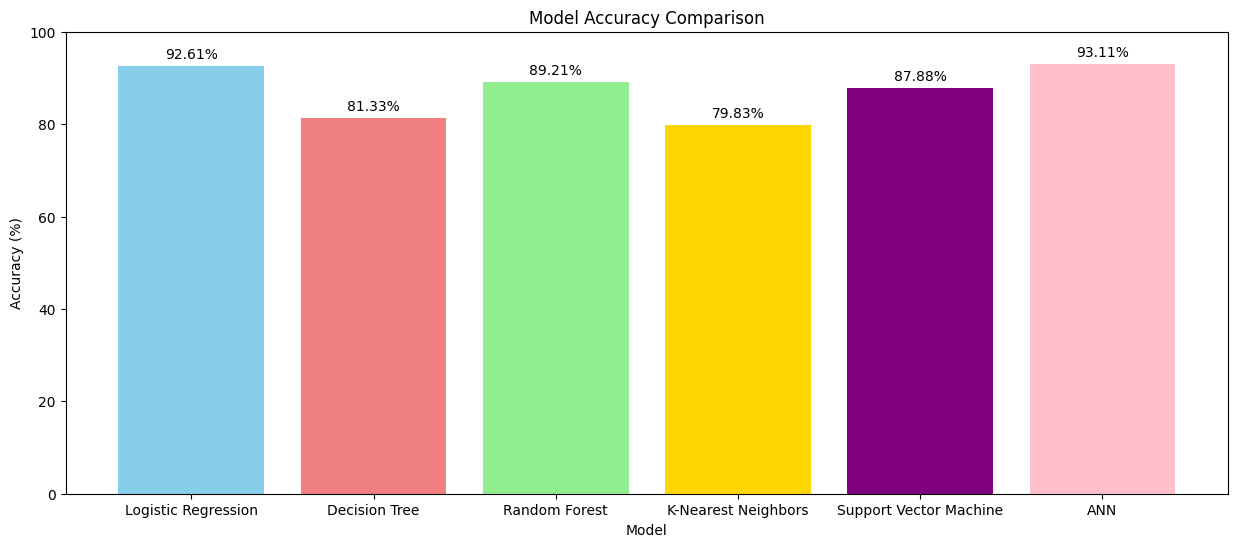

In [382]:
plt.figure(figsize=(15, 6))
plt.bar(models, accuracy, color=['skyblue', 'lightcoral', 'lightgreen', 'gold','purple','pink'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

for i, score in enumerate(accuracy):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center', va='bottom')

plt.show()